In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql import functions as F

In [2]:

# Initialize Spark session
spark = SparkSession.builder.appName("Read_CSV").getOrCreate()

# Load data
Data = spark.read.csv("Insurance_data.csv", sep=",", inferSchema="true",header="true")

In [3]:
Data.limit(10).toPandas()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision
5,Oct,4,Friday,Honda,Urban,Wednesday,Nov,1,Male,Single,...,5 years,21 to 25,No,No,External,3 to 5,no change,1 vehicle,1994,Collision
6,Feb,1,Saturday,Honda,Urban,Monday,Feb,3,Male,Married,...,7 years,36 to 40,No,No,External,1 to 2,no change,1 vehicle,1994,Collision
7,Nov,1,Friday,Honda,Urban,Tuesday,Mar,4,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,Collision
8,Dec,4,Saturday,Honda,Urban,Wednesday,Dec,5,Male,Single,...,6 years,31 to 35,No,Yes,External,3 to 5,no change,1 vehicle,1994,Collision
9,Apr,3,Tuesday,Ford,Urban,Wednesday,Apr,3,Male,Married,...,more than 7,36 to 40,No,No,External,3 to 5,no change,1 vehicle,1994,All Perils


In [4]:
Data.printSchema()

root
 |-- Month: string (nullable = true)
 |-- WeekOfMonth: integer (nullable = true)
 |-- DayOfWeek: string (nullable = true)
 |-- Make: string (nullable = true)
 |-- AccidentArea: string (nullable = true)
 |-- DayOfWeekClaimed: string (nullable = true)
 |-- MonthClaimed: string (nullable = true)
 |-- WeekOfMonthClaimed: integer (nullable = true)
 |-- Sex: string (nullable = true)
 |-- MaritalStatus: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Fault: string (nullable = true)
 |-- PolicyType: string (nullable = true)
 |-- VehicleCategory: string (nullable = true)
 |-- VehiclePrice: string (nullable = true)
 |-- FraudFound_P: integer (nullable = true)
 |-- PolicyNumber: integer (nullable = true)
 |-- RepNumber: integer (nullable = true)
 |-- Deductible: integer (nullable = true)
 |-- DriverRating: integer (nullable = true)
 |-- Days_Policy_Accident: string (nullable = true)
 |-- Days_Policy_Claim: string (nullable = true)
 |-- PastNumberOfClaims: string (nullable =

In [5]:
Data=Data.withColumnRenamed("FraudFound_P","Fraud")

In [6]:
Data.show()

+-----+-----------+---------+---------+------------+----------------+------------+------------------+------+-------------+---+-------------+--------------------+---------------+---------------+-----+------------+---------+----------+------------+--------------------+-----------------+------------------+------------+-----------------+-----------------+--------------+---------+-------------------+-------------------+------------+----+----------+
|Month|WeekOfMonth|DayOfWeek|     Make|AccidentArea|DayOfWeekClaimed|MonthClaimed|WeekOfMonthClaimed|   Sex|MaritalStatus|Age|        Fault|          PolicyType|VehicleCategory|   VehiclePrice|Fraud|PolicyNumber|RepNumber|Deductible|DriverRating|Days_Policy_Accident|Days_Policy_Claim|PastNumberOfClaims|AgeOfVehicle|AgeOfPolicyHolder|PoliceReportFiled|WitnessPresent|AgentType|NumberOfSuppliments|AddressChange_Claim|NumberOfCars|Year|BasePolicy|
+-----+-----------+---------+---------+------------+----------------+------------+------------------+---

In [7]:
Data.columns

['Month',
 'WeekOfMonth',
 'DayOfWeek',
 'Make',
 'AccidentArea',
 'DayOfWeekClaimed',
 'MonthClaimed',
 'WeekOfMonthClaimed',
 'Sex',
 'MaritalStatus',
 'Age',
 'Fault',
 'PolicyType',
 'VehicleCategory',
 'VehiclePrice',
 'Fraud',
 'PolicyNumber',
 'RepNumber',
 'Deductible',
 'DriverRating',
 'Days_Policy_Accident',
 'Days_Policy_Claim',
 'PastNumberOfClaims',
 'AgeOfVehicle',
 'AgeOfPolicyHolder',
 'PoliceReportFiled',
 'WitnessPresent',
 'AgentType',
 'NumberOfSuppliments',
 'AddressChange_Claim',
 'NumberOfCars',
 'Year',
 'BasePolicy']

In [8]:
Data.dtypes

[('Month', 'string'),
 ('WeekOfMonth', 'int'),
 ('DayOfWeek', 'string'),
 ('Make', 'string'),
 ('AccidentArea', 'string'),
 ('DayOfWeekClaimed', 'string'),
 ('MonthClaimed', 'string'),
 ('WeekOfMonthClaimed', 'int'),
 ('Sex', 'string'),
 ('MaritalStatus', 'string'),
 ('Age', 'int'),
 ('Fault', 'string'),
 ('PolicyType', 'string'),
 ('VehicleCategory', 'string'),
 ('VehiclePrice', 'string'),
 ('Fraud', 'int'),
 ('PolicyNumber', 'int'),
 ('RepNumber', 'int'),
 ('Deductible', 'int'),
 ('DriverRating', 'int'),
 ('Days_Policy_Accident', 'string'),
 ('Days_Policy_Claim', 'string'),
 ('PastNumberOfClaims', 'string'),
 ('AgeOfVehicle', 'string'),
 ('AgeOfPolicyHolder', 'string'),
 ('PoliceReportFiled', 'string'),
 ('WitnessPresent', 'string'),
 ('AgentType', 'string'),
 ('NumberOfSuppliments', 'string'),
 ('AddressChange_Claim', 'string'),
 ('NumberOfCars', 'string'),
 ('Year', 'int'),
 ('BasePolicy', 'string')]

In [9]:
Data.describe().show()

+-------+-----+------------------+---------+------+------------+----------------+------------+------------------+------+-------------+------------------+-------------+-------------------+---------------+---------------+-------------------+-----------------+-----------------+------------------+------------------+--------------------+-----------------+------------------+------------+-----------------+-----------------+--------------+---------+-------------------+-------------------+------------+------------------+----------+
|summary|Month|       WeekOfMonth|DayOfWeek|  Make|AccidentArea|DayOfWeekClaimed|MonthClaimed|WeekOfMonthClaimed|   Sex|MaritalStatus|               Age|        Fault|         PolicyType|VehicleCategory|   VehiclePrice|              Fraud|     PolicyNumber|        RepNumber|        Deductible|      DriverRating|Days_Policy_Accident|Days_Policy_Claim|PastNumberOfClaims|AgeOfVehicle|AgeOfPolicyHolder|PoliceReportFiled|WitnessPresent|AgentType|NumberOfSuppliments|Addres

In [10]:
Data.groupBy(["Sex","MaritalStatus"]).count().show()

+------+-------------+-----+
|   Sex|MaritalStatus|count|
+------+-------------+-----+
|  Male|       Single| 3653|
|  Male|     Divorced|   36|
|Female|        Widow|   24|
|  Male|        Widow|   11|
|Female|       Single| 1031|
|Female|     Divorced|   40|
|  Male|      Married| 9300|
|Female|      Married| 1325|
+------+-------------+-----+



In [11]:
Data.groupBy(["Year","Fault"]).count().show()

+----+-------------+-----+
|Year|        Fault|count|
+----+-------------+-----+
|1995|  Third Party| 1420|
|1994|Policy Holder| 4508|
|1996|Policy Holder| 2947|
|1996|  Third Party| 1136|
|1994|  Third Party| 1634|
|1995|Policy Holder| 3775|
+----+-------------+-----+



In [12]:

Data.filter((Data.WitnessPresent=="Yes") & (Data.PoliceReportFiled=="Yes")).show()

+-----+-----------+---------+---------+------------+----------------+------------+------------------+------+-------------+---+-------------+------------------+---------------+---------------+-----+------------+---------+----------+------------+--------------------+-----------------+------------------+------------+-----------------+-----------------+--------------+---------+-------------------+-------------------+------------+----+----------+
|Month|WeekOfMonth|DayOfWeek|     Make|AccidentArea|DayOfWeekClaimed|MonthClaimed|WeekOfMonthClaimed|   Sex|MaritalStatus|Age|        Fault|        PolicyType|VehicleCategory|   VehiclePrice|Fraud|PolicyNumber|RepNumber|Deductible|DriverRating|Days_Policy_Accident|Days_Policy_Claim|PastNumberOfClaims|AgeOfVehicle|AgeOfPolicyHolder|PoliceReportFiled|WitnessPresent|AgentType|NumberOfSuppliments|AddressChange_Claim|NumberOfCars|Year|BasePolicy|
+-----+-----------+---------+---------+------------+----------------+------------+------------------+------+

In [13]:
Data.groupBy(["AccidentArea","VehicleCategory"]).agg(F.mode("Month")).show()

+------------+---------------+-----------+
|AccidentArea|VehicleCategory|mode(Month)|
+------------+---------------+-----------+
|       Rural|          Sedan|        Mar|
|       Urban|          Sport|        Jan|
|       Rural|        Utility|        Oct|
|       Urban|        Utility|        Dec|
|       Urban|          Sedan|        Jan|
|       Rural|          Sport|        Jun|
+------------+---------------+-----------+



In [14]:
Data.groupBy(["Sex","VehicleCategory"]).agg(F.mean("Age")).sort("Sex").show()

+------+---------------+------------------+
|   Sex|VehicleCategory|          avg(Age)|
+------+---------------+------------------+
|Female|        Utility|              39.0|
|Female|          Sedan| 37.35429769392034|
|Female|          Sport| 37.87955465587044|
|  Male|          Sedan|40.425606796116504|
|  Male|          Sport|39.583981693363846|
|  Male|        Utility| 45.04615384615385|
+------+---------------+------------------+



In [15]:
Data.groupBy(["Sex","BasePolicy"]).agg(F.min("Age"),F.max("Age")).show()

+------+----------+--------+--------+
|   Sex|BasePolicy|min(Age)|max(Age)|
+------+----------+--------+--------+
|  Male| Liability|       0|      80|
|  Male| Collision|       0|      80|
|Female| Liability|      18|      80|
|Female|All Perils|      18|      80|
|Female| Collision|      16|      80|
|  Male|All Perils|       0|      80|
+------+----------+--------+--------+



In [16]:
Data.groupBy(["Make","VehicleCategory"]).agg(F.mean('Age')).show()

+-------+---------------+------------------+
|   Make|VehicleCategory|          avg(Age)|
+-------+---------------+------------------+
|Mercury|        Utility|              49.0|
|  Honda|        Utility|               0.0|
|     VW|          Sport|44.347457627118644|
| Toyota|        Utility|              33.0|
| Jaguar|          Sport|33.333333333333336|
|     VW|        Utility|              72.0|
| Toyota|          Sedan| 40.72346368715084|
|  Honda|          Sport| 33.98199672667758|
| Porche|        Utility|              60.0|
| Jaguar|          Sedan|35.666666666666664|
|   Ford|        Utility|45.388888888888886|
|  Dodge|          Sedan| 38.11940298507463|
|   Ford|          Sport| 45.48091603053435|
|Mercury|          Sedan|42.310344827586206|
| Nisson|          Sport|              35.5|
|  Mazda|          Sedan| 38.97832369942196|
|Mecedes|          Sedan|              47.5|
| Nisson|          Sedan| 41.44444444444444|
|Ferrari|        Utility|              39.5|
|   Ford| 

**Insurance claimed in before 2000 with police report**

In [17]:
Data.filter(Data.PoliceReportFiled=="Yes").show()

+-----+-----------+---------+-------+------------+----------------+------------+------------------+------+-------------+---+-------------+--------------------+---------------+---------------+-----+------------+---------+----------+------------+--------------------+-----------------+------------------+------------+-----------------+-----------------+--------------+---------+-------------------+-------------------+------------+----+----------+
|Month|WeekOfMonth|DayOfWeek|   Make|AccidentArea|DayOfWeekClaimed|MonthClaimed|WeekOfMonthClaimed|   Sex|MaritalStatus|Age|        Fault|          PolicyType|VehicleCategory|   VehiclePrice|Fraud|PolicyNumber|RepNumber|Deductible|DriverRating|Days_Policy_Accident|Days_Policy_Claim|PastNumberOfClaims|AgeOfVehicle|AgeOfPolicyHolder|PoliceReportFiled|WitnessPresent|AgentType|NumberOfSuppliments|AddressChange_Claim|NumberOfCars|Year|BasePolicy|
+-----+-----------+---------+-------+------------+----------------+------------+------------------+------+--

**How many honda present in vehicle category?**

In [18]:
Data.filter(Data["Make"]=="Honda").groupBy("VehicleCategory").count().show()

+---------------+-----+
|VehicleCategory|count|
+---------------+-----+
|          Sedan| 1570|
|        Utility|    9|
|          Sport| 1222|
+---------------+-----+



**How much fraud happened in each years which are done by females?**

In [19]:
Data.filter((Data["Fraud"]==1) & (Data["Sex"]=="Female")).groupBy("Year").count().show()

+----+-----+
|Year|count|
+----+-----+
|1994|   40|
|1996|   26|
|1995|   39|
+----+-----+



# VISUALIZATION

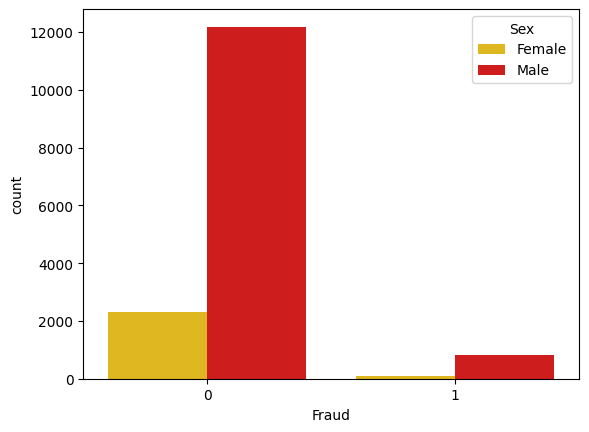

In [20]:
df=Data.toPandas()
sns.color_palette()
sns.countplot(x=df["Fraud"],hue="Sex",palette="hot_r",data=df)
plt.show()

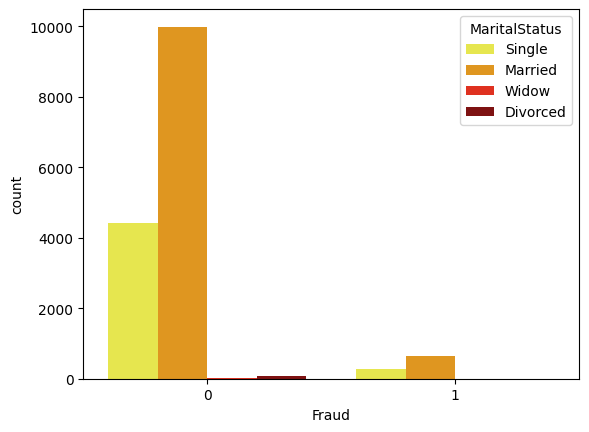

In [21]:
sns.countplot(x=df["Fraud"],hue="MaritalStatus",palette="hot_r",data=df)
plt.show()

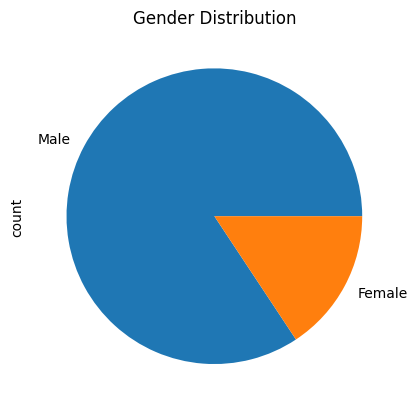

In [22]:
df["Sex"].value_counts().plot(kind="pie")
plt.title("Gender Distribution")
plt.show()

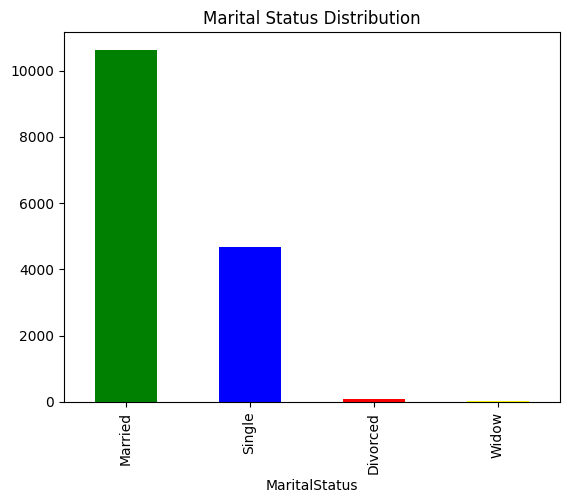

In [23]:
df["MaritalStatus"].value_counts().plot(kind="bar",color=["Green","Blue","Red","yellow"])
plt.title("Marital Status Distribution")
plt.show()

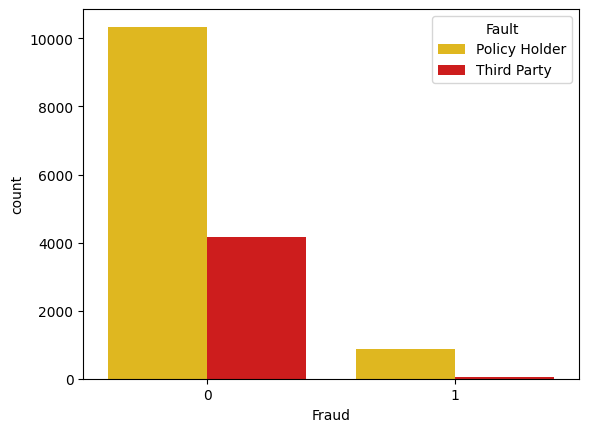

In [24]:
sns.countplot(x=df["Fraud"],hue="Fault",palette="hot_r",data=df)
plt.show()

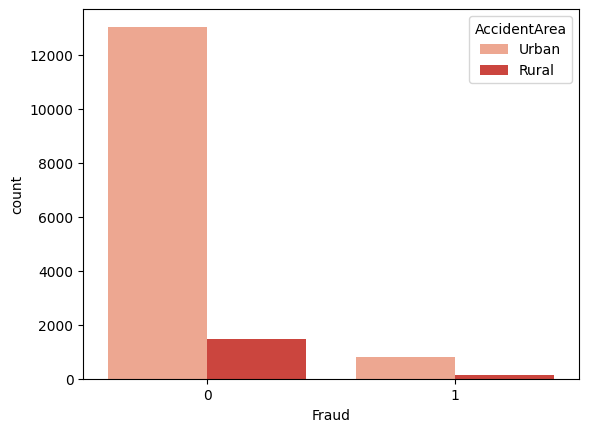

In [25]:
sns.countplot(x=df["Fraud"],hue="AccidentArea",palette="Reds",data=df)
plt.show()

<ipython-input-26-024b01725cb2>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fraud_count_by_month, x="Month", y="Fraud", palette="Blues")


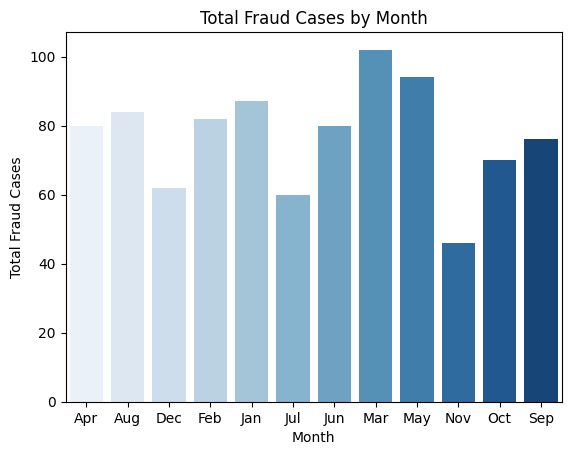

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

fraud_count_by_month = df.groupby("Month")["Fraud"].sum().reset_index()

sns.barplot(data=fraud_count_by_month, x="Month", y="Fraud", palette="Blues")
plt.xlabel("Month")
plt.ylabel("Total Fraud Cases")
plt.title("Total Fraud Cases by Month")
plt.show()

<ipython-input-27-ead7934478fe>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fraud_count_by_month, x="Year", y="Fraud", palette="Greens")


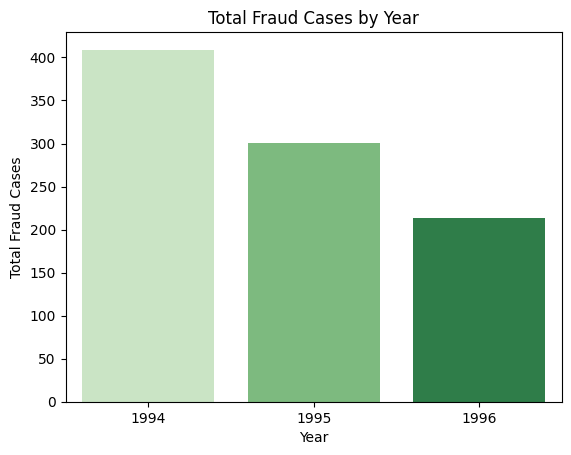

In [27]:


fraud_count_by_month = df.groupby("Year")["Fraud"].sum().reset_index()

sns.barplot(data=fraud_count_by_month, x="Year", y="Fraud", palette="Greens")
plt.xlabel("Year")
plt.ylabel("Total Fraud Cases")
plt.title("Total Fraud Cases by Year")
plt.show()

**CREATION OF MODEL**

In [30]:
En_col=["AccidentArea","MonthClaimed","Make","DayOfWeek","WitnessPresent","VehicleCategory","PolicyType","PoliceReportFiled","Fault","Month","Sex","MaritalStatus","AgentType","NumberOfCars","BasePolicy"]
from sklearn.preprocessing import LabelEncoder

for col in En_col:
    lb=LabelEncoder()
    df[col]=lb.fit_transform(df[col])

In [32]:
# independent variable and dependent variable
x=df[["AccidentArea","MonthClaimed","Make","DayOfWeek","WitnessPresent","VehicleCategory","PolicyType","PoliceReportFiled","Fault","Month","Sex","MaritalStatus","AgentType","NumberOfCars","BasePolicy"]]
y=df["Fraud"]

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.25,random_state=0)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [39]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
classifier.fit(x_train,y_train)

KNeighborsClassifier()

In [43]:
from sklearn.metrics import confusion_matrix,accuracy_score
y_pred=classifier.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 93.44
